In [1]:
import pandas as pd
import numpy as np
from infromation_theory_utils import Dissimilarity_JSD
from scipy.linalg import svd, toeplitz
import matplotlib.pyplot as plt
%matplotlib inline

## Baseline Dataset Plot

In [3]:
lag = 512 # [32, 64, 128, 256, 512] 

base = pd.read_pickle('../pkl_datasets/baseline_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

In [4]:
Dissimilarity_matrix = np.zeros((7,7))

for index1, row1 in base.iterrows():
    lab1 = '$s_{'+(row1['ID'].split('.'))[-2].split('0')[-1]+'}$'
    r1 = row1['ACF_512']
    for index2, row2 in base.iterrows():
        lab2 = '$s_{'+(row2['ID'].split('.'))[-2].split('0')[-1]+'}$'
        r2 = row2['ACF_512']
        
        Sxx1 = toeplitz(r1)
        _, s1, _ = svd(Sxx1)
        
        Sxx2 = toeplitz(r2)
        _, s2, _ = svd(Sxx2)
        
        D = Dissimilarity_JSD(s1, s2)
        Dissimilarity_matrix[index1, index2] = D

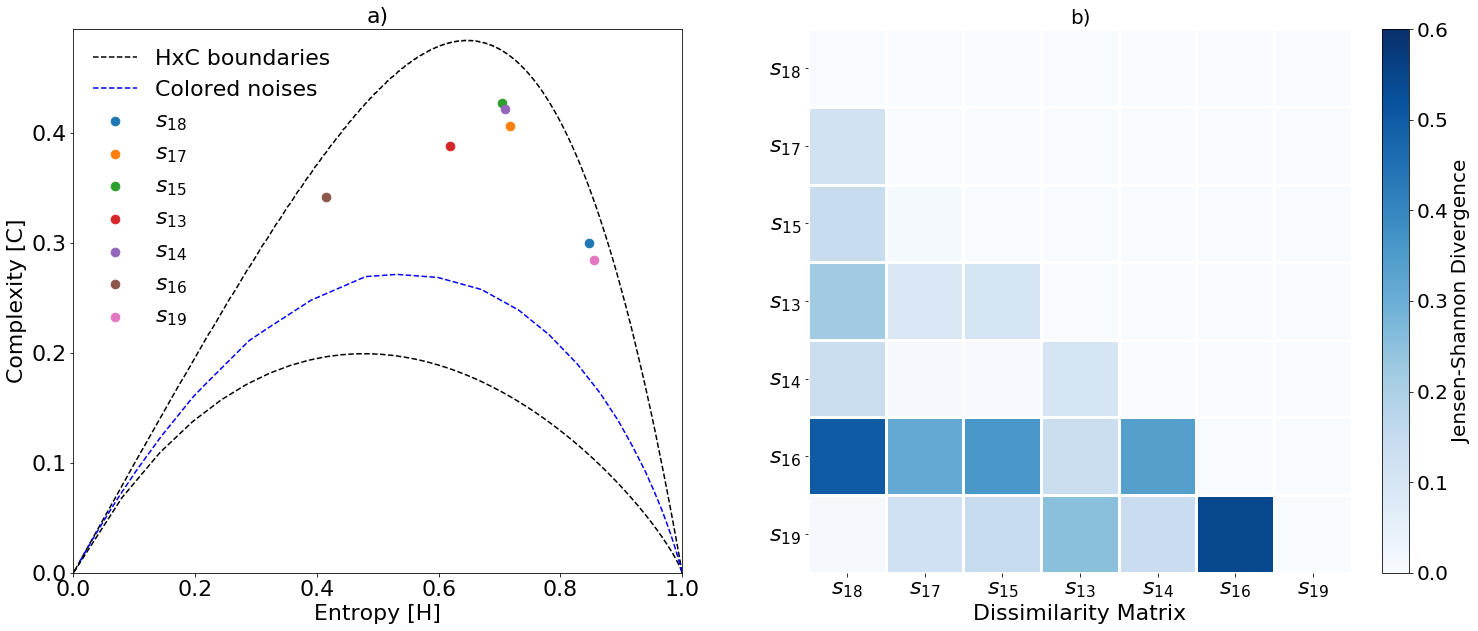

In [5]:
plt.figure(figsize=(24,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.subplot(1,2,1)
for index, row in base.iterrows():
    lab = '$s_{'+(row['ID'].split('.'))[-2].split('0')[-1]+'}$'
    plt.scatter(row['H'], row['C'], marker='.', s=300, label = lab)


plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.legend(loc = 'upper left', frameon=False)
plt.title('a)')

plt.subplot(1,2,2)
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
    
columns_labels = ['$s_{18}$', '$s_{17}$', '$s_{15}$', '$s_{13}$', '$s_{14}$', '$s_{16}$', '$s_{19}$']

plt.imshow(np.tril(Dissimilarity_matrix, -1), cmap=plt.cm.Blues, interpolation='none', vmin=0, vmax=.6)
cbar = plt.colorbar(fraction=.05)
cbar.ax.set_ylabel('Jensen-Shannon Divergence')

ax = plt.gca()
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(7))
ax.set_xticklabels(columns_labels)
ax.set_yticklabels(columns_labels)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xticks(np.arange(7+1)-.5, minor=True)
ax.set_yticks(np.arange(7+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
plt.xlabel('Dissimilarity Matrix')
plt.title('b)')

plt.savefig('./figures/Fig2.eps', format="eps", bbox_inches='tight')
plt.show()